#### Histopathologic Cancer Detection
    - Site Location: https://www.kaggle.com/competitions/histopathologic-cancer-detection/overview
##### Student - Cole Gaito
##### University of Colorado - AI Course

### Resource List for Building CNNs with PyTorch

#### 1. PyTorch Basics and Setup

- **PyTorch Official Documentation**:
  - [PyTorch Official Website](https://pytorch.org/)
  - [PyTorch Tutorials](https://pytorch.org/tutorials/)
  - [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)

- **Installing PyTorch**:
  - [PyTorch Installation Guide](https://pytorch.org/get-started/locally/)
  - Use the specific installation command for your system (e.g., CUDA version).

#### 2. Understanding Convolutional Neural Networks (CNNs)

- **Introductory Articles**:
  - [Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) - Stanford's CS231n notes
  - [Understanding Convolutional Neural Networks (CNNs)](https://towardsdatascience.com/understanding-convolutional-neural-networks-cnns-284fa637af0c) - Medium article

- **Video Tutorials**:
  - [Deep Learning Specialization by Andrew Ng](https://www.coursera.org/specializations/deep-learning) - Coursera
  - [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

#### 3. Building CNNs with PyTorch

- **Tutorials**:
  - [PyTorch: Building a Convolutional Neural Network](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
  - [Building CNNs using PyTorch: A Comprehensive Guide](https://towardsdatascience.com/building-convnets-in-pytorch-with-examples-3ffa2ae5cb59)

- **Video Series**:
  - [PyTorch for Deep Learning & Machine Learning](https://www.youtube.com/watch?v=GIsg-ZUy0MY) - YouTube series by Python Engineer
  - [CNN Architectures - From Simple to Complex](https://www.youtube.com/watch?v=vq2nnJ4g6N0) - YouTube video by Yann LeCun

#### 4. Data Preprocessing and Augmentation

- **PyTorch Transforms**:
  - [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)
  - [Data Augmentation in PyTorch](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

- **Articles**:
  - [A Comprehensive Guide to Data Augmentation in Deep Learning](https://towardsdatascience.com/a-comprehensive-guide-to-data-augmentation-in-deep-learning-8baa33d43735)

#### 5. Model Training and Optimization

- **Training and Optimization**:
  - [Optimization in PyTorch](https://pytorch.org/tutorials/beginner/optim_tutorial.html)
  - [A Comprehensive Guide to Training Neural Networks with PyTorch](https://towardsdatascience.com/a-comprehensive-guide-to-training-neural-networks-with-pytorch-9677f54dab0b)

- **Hyperparameter Tuning**:
  - [Hyperparameter Tuning in PyTorch](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)
  - [Grid Search and Random Search for Hyperparameter Tuning](https://towardsdatascience.com/grid-search-and-random-search-for-hyperparameter-optimization-7f5cd4b4d2af)

- **Regularization Techniques**:
  - [Understanding Dropout in Neural Networks](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)
  - [Batch Normalization in PyTorch](https://pytorch.org/docs/stable/nn.html#batchnorm2d)

#### 6. Evaluation and Metrics

- **Evaluation Techniques**:
  - [Evaluating Model Performance](https://towardsdatascience.com/evaluating-the-performance-of-machine-learning-models-59032b1a7b3a)
  - [Using ROC Curves and AUC in PyTorch](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

- **Confusion Matrix and Metrics**:
  - [Precision, Recall, and F1 Score for Imbalanced Datasets](https://towardsdatascience.com/precision-recall-and-f1-score-for-imbalanced-datasets-386cd44f42d1)
  - [Confusion Matrix in PyTorch](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)


In [1]:
#Basic Hello World program
#Tested on Python 3.12.4
#Ensure that the Kernel is operational
print("Hello World")

Hello World


In [2]:
#Check if Numpy is available
import sys
print(sys.executable)
import numpy as np
print(np.__version__)
print("Python executable:", sys.executable)
print("Python version:", sys.version)
!pip list

/Library/Frameworks/Python.framework/Versions/3.12/bin/python3
1.26.4
Python executable: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3
Python version: 3.12.4 (v3.12.4:8e8a4baf65, Jun  6 2024, 17:33:18) [Clang 13.0.0 (clang-1300.0.29.30)]
Package                   Version
------------------------- --------------
anyio                     4.4.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.7.4
cffi                      1.16.0
charset-normalizer        3.3.2
cloudpickle               3.0.0
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml          

In [3]:
#pip install numpy --upgrade

In [4]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt


Now that we have imported the various objects of utilized for Pytorch and our ML Algorithims lets start building.  We will begin by creating a subclass of the Dataset called CancerDataset.

In [5]:
#Get the current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/gaitocole/Desktop/Intro to AI/introToAI_CU_HW5


In [6]:
#Directory Locations to ease use later.
csv_file_path = "/Users/gaitocole/Desktop/Intro_to_AI/introToAI_CU_HW5/train_labels.csv"
train_dir_path = "/Users/gaitocole/Desktop/Intro_to_AI/introToAI_CU_HW5/train"
val_labels_path = "/Users/gaitocole/Desktop/Intro_to_AI/introToAI_CU_HW5/val_labels.csv"

In [19]:
#Creating a training DataSet
train_labels = pd.read_csv(csv_file_path)
print(train_labels.head())
train_df, val_df = train_test_split(train_labels, test_size=0.2, random_state=42)
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
val_df.to_csv(val_labels_path, index=False)

print("Validation dataset created and saved as 'val_labels.csv'.")
print(val_df.head())

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
Training set size: 176020
Validation set size: 44005
Validation dataset created and saved as 'val_labels.csv'.
                                              id  label
107796  d293308913e4a40cebb809d986aa9add65a76bfa      0
11942   fcd55f03496afb4b11598d9c2231e86da318e723      1
163858  5c983c8f14afeffdb098b9f3cbb68488a802b957      0
184810  71bf03e8530348e57ec07d8ce2052f215390c997      0
150958  1533406000e26663c5fadac3bcc3e38285a45bb3      1


In [20]:
# Check if the file exists in the current directory
if 'val_labels.csv' in os.listdir():
    print("File 'val_labels.csv' exists.")
else:
    print("File 'val_labels.csv' not found. Please check the path.")

File 'val_labels.csv' not found. Please check the path.


In [8]:
class CancerDataset(Dataset):
    #Arguements: csv_file - location of the csv file in a string format
    #            root_dir - directory with all the images in a string format
    #            transform - callable and optional toggle for a sample set
    def __init__(self, csv_file, root_dir, transform=None):
        self.labels_df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = os.path.join(self.root_dir, self.labels_df.iloc[idx, 0] + '.tif')
        image = Image.open(img_name)
        label = self.labels_df.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [9]:
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [10]:
train_dataset = CancerDataset(csv_file='train_labels.csv', root_dir='train', transform=transform)

In [11]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [12]:
# Function to visualize a batch of images and labels
def show_images(images, labels, n=5):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        img = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array and permute dimensions for display
        img = img * 0.229 + 0.485  # Unnormalize if needed (adjust this based on normalization)
        plt.imshow(img)
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.08956].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.08956].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0775862].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.08956].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.08956].


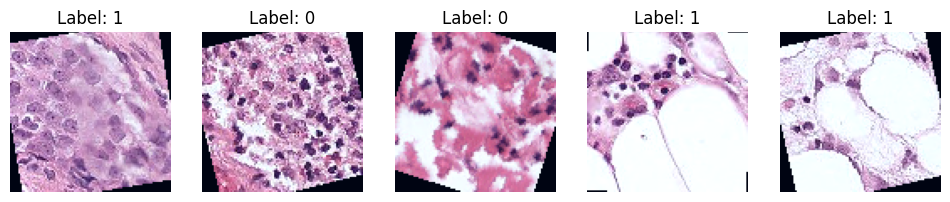

In [13]:
for images, labels in train_loader:
    show_images(images, labels, n=5)
    break  # Just to test the first batch


Understanding the Output
Image Batch Shape

python
Copy code
torch.Size([32, 3, 96, 96])
[32, 3, 96, 96]:
32: This is the batch size, indicating that 32 images are being processed at once.
3: This represents the number of color channels (Red, Green, Blue) in each image.
96, 96: These are the height and width of the images, resized to 96x96 pixels as specified in the transformation pipeline.
This output confirms that the data loader is correctly batching and transforming the image data.

Labels Tensor

python
Copy code
tensor([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1])
This tensor contains the labels for each image in the batch.
0 and 1 are binary labels, where 1 might represent the presence of cancerous cells and 0 might represent non-cancerous cells.
The tensor length is 32, matching the batch size, ensuring that each image has a corresponding label.
Verifying the Dataset Class
Dataset class and data loader are functioning correctly, as evidenced by the output. This means:

Data Loading: Images and labels are loaded correctly from their respective paths and CSV files.
Transformations: The transformations, such as resizing and normalizing the images, are being applied properly.
Batching: The data loader is batching images and labels together as expected.


Explanation of the Visualization Code
permute(1, 2, 0): Changes the order of dimensions from [C, H, W] to [H, W, C] for correct visualization with matplotlib.
Unnormalize: If you normalized the images using mean and standard deviation, you may want to reverse this normalization for visualization purposes.
Loop and Plot: Loops through the first few images and plots them with their corresponding labels.

In [15]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 12 * 12, 512)  # Adjust dimensions based on input size
        self.fc2 = nn.Linear(512, 1)
        
        # Dropout layer for regularization
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # Flatten the tensor before the fully connected layers
        x = x.view(-1, 128 * 12 * 12)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        
        return x

# Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN()
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=18432, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


Explanation of the Architecture
Convolutional Layers:
conv1, conv2, conv3: Three convolutional layers with increasing number of filters (32, 64, 128). The kernel size is 3x3, and padding ensures the output size remains consistent.
Pooling Layer:
MaxPool2d: Reduces the spatial dimensions by half, effectively downsampling the feature maps.
Fully Connected Layers:
fc1: Connects the flattened feature maps to a dense layer with 512 units.
fc2: Outputs a single value between 0 and 1, representing the probability of the presence of cancerous cells.
Dropout:
Used to prevent overfitting by randomly setting some neurons to zero during training.
Activation Functions:
ReLU: Non-linear activation function applied after each convolutional layer.
Sigmoid: Used at the final layer for binary classification.

In [16]:
# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels.float().view(-1, 1))  # Calculate loss
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


Epoch [1/1], Loss: 0.3640


In [ ]:
Results from Above
Epoch [1/10], Loss: 0.3384
Epoch [2/10], Loss: 0.2438
Epoch [3/10], Loss: 0.2116
Epoch [4/10], Loss: 0.1918
Epoch [5/10], Loss: 0.1793
Epoch [6/10], Loss: 0.1655
Epoch [7/10], Loss: 0.1537
Epoch [8/10], Loss: 0.1529
Epoch [9/10], Loss: 0.1415
Epoch [10/10], Loss: 0.1312

Explanation of the Training Loop
Model Training:
model.train(): Sets the model to training mode, enabling features like dropout and batch normalization.
Zero Gradients:
optimizer.zero_grad(): Clears old gradients to prevent accumulation.
Forward Pass:
outputs = model(images): Computes predictions using the model.
Calculate Loss:
criterion(outputs, labels): Computes the binary cross-entropy loss between predictions and true labels.
Backward Pass and Optimization:
loss.backward(): Computes gradients of the loss with respect to model parameters.
optimizer.step(): Updates model parameters based on computed gradients.
Track Loss:
running_loss: Accumulates the loss for each batch, allowing us to track training progress.

In [17]:
def evaluate_model(model, val_loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():  # Disable gradient computation for evaluation
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device).float().view(-1, 1)
            
            outputs = model(images)
            preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate accuracy
    accuracy = accuracy_score(all_labels, np.round(all_preds))
    
    # Calculate AUC-ROC
    auc = roc_auc_score(all_labels, all_preds)
    
    print(f'Validation Accuracy: {accuracy:.4f}')
    print(f'Validation AUC-ROC: {auc:.4f}')

# Prepare validation dataset and dataloader
val_dataset = CancerDataset(csv_file='val_labels.csv', root_dir='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Evaluate the model
evaluate_model(model, val_loader)

FileNotFoundError: [Errno 2] No such file or directory: 'val_labels.csv'

Explanation of the Evaluation Code
Evaluation Mode:
model.eval(): Sets the model to evaluation mode, disabling dropout and batch normalization updates.
Disable Gradients:
torch.no_grad(): Disables gradient calculation, reducing memory usage and speeding up computations during evaluation.
Accuracy Calculation:
Binary Predictions: Threshold the outputs at 0.5 to get binary predictions.
Accuracy: Calculate the proportion of correct predictions over the total number of samples.
AUC-ROC Calculation:
roc_auc_score: Computes the Area Under the Receiver Operating Characteristic Curve, a robust metric for binary classification.